In [10]:
from lib.Locate_ppl import Locate_ppl
from lib.Recognizer import Recognizer
from lib.PersonEmbeding import PersonEmbeding
from lib.EmbedingsManiger import EmbedingsManiger
from matplotlib import pyplot as plt
import torch
lp = Locate_ppl()
rec = Recognizer("test")
emb_maniger = EmbedingsManiger(cache_ram=True)
pe = PersonEmbeding()

Using cache found in C:\Users\artur/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub
Using cache found in C:\Users\artur/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub
Using cache found in C:\Users\artur/.cache\torch\hub\pytorch_vision_v0.5.0
models/test.ckpt not found ...
Starting with random weights


In [2]:
print(emb_maniger.info)

{'Arturas', 'Others'}


In [51]:
#emb_maniger.remove('ArturasRedHoody')

True

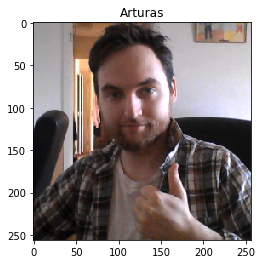

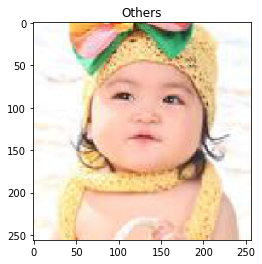

In [3]:
emb_maniger.show_all()


In [5]:
#emb_maniger.remove("Arturas")

True

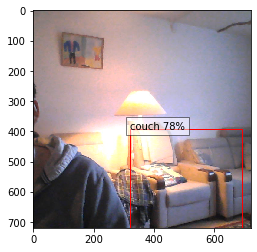

In [2]:
ppl = lp.snap()

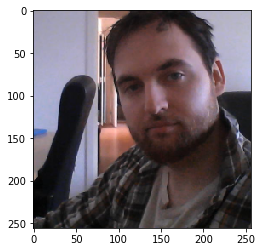

In [14]:
plt.imshow(ppl[0])
plt.show()

In [6]:
p = next(iter(ppl))
print(p.shape)
emb = pe.embed(ppl)
print(emb.shape)
r = rec(emb)
print(r)

(256, 256, 3)
torch.Size([1, 512])
tensor([[0.4489, 0.5511]])


In [7]:
a = []

In [8]:
def get_data(data, it=3):
    c = 0
    for img in lp:
        if len(img)==0:
            continue
        print(c)
        for i in img:
            plt.imshow(i)
            plt.show()
        emb = pe.gen_training_emb(img)
        for e in emb:
            data.append(e)
        c+=1
        if c >= it:
            break

0


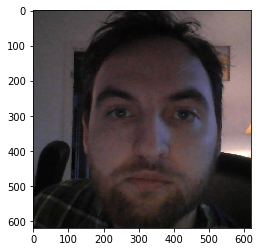

1


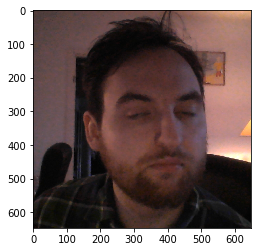

2


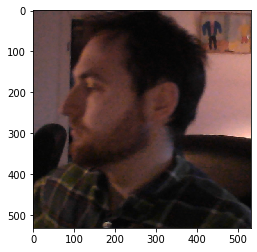

3


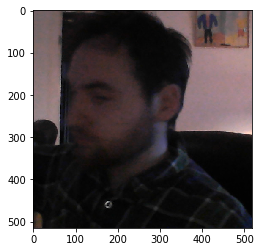

4


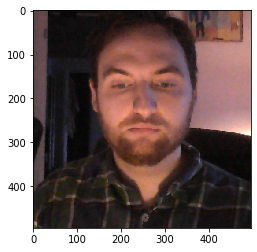

5


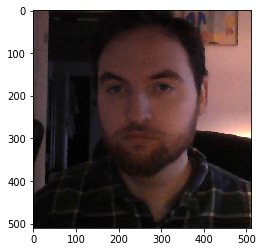

6


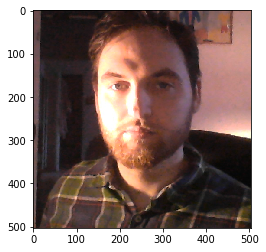

7


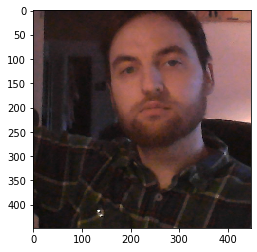

8


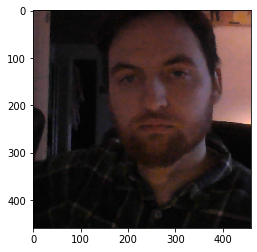

9


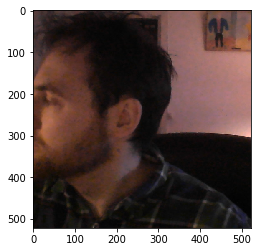

160

In [9]:
get_data(a, 10)
len(a)

In [10]:
len(a)


160

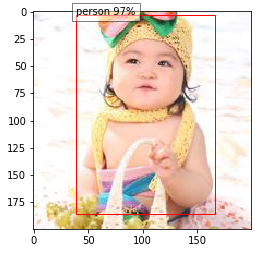

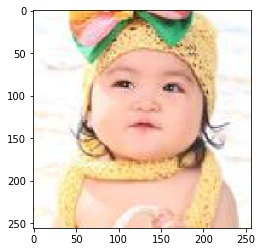

In [41]:
ppl = lp.snap()

In [11]:
#emb_maniger.new("Others", ppl[0], a)
#emb_maniger.add("Others", b)
#emb_maniger.add("Arturas", a)

True

In [12]:
for n in emb_maniger.info:
    print(n, emb_maniger.get_len(n))
    

Others 910
Arturas 1120


In [4]:
models = [Recognizer(n, load=False) for n in emb_maniger.info]

In [5]:
for person in models:
    print(person.name)
    person.get_beter(emb_maniger)

Arturas
curret loss:0.0012763421824534557
Others
curret loss:0.0012897469983487338


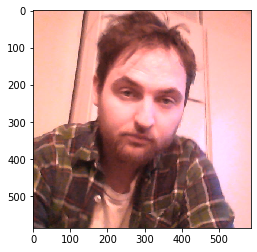

Arturas tensor(0.8978)
Others tensor(0.2081)


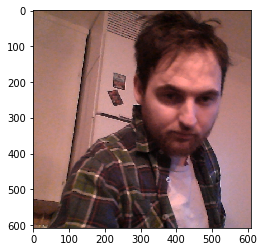

Arturas tensor(0.9038)
Others tensor(0.1129)


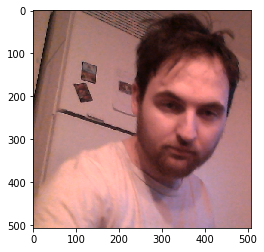

Arturas tensor(0.6473)
Others tensor(0.4525)


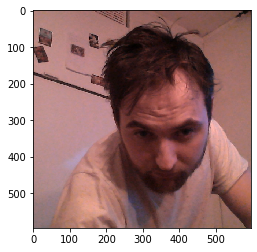

Arturas tensor(0.8747)
Others tensor(0.2909)


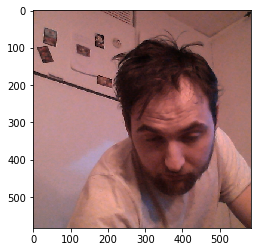

Arturas tensor(0.8417)
Others tensor(0.2479)


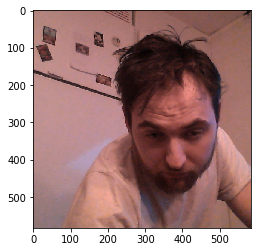

Arturas tensor(0.6571)
Others tensor(0.4344)


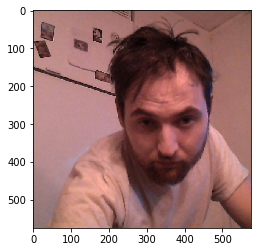

Arturas tensor(0.8971)
Others tensor(0.1787)


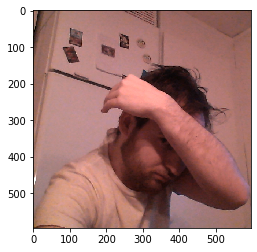

Arturas tensor(0.7825)
Others tensor(0.4682)


In [11]:
for img in lp:
    if len(img) == 0:
        continue
    for i in img:
        plt.imshow(i)
        plt.show()
    
    emb = pe.embed(img)
    for reco in models:
        r = reco(emb)
        for p in r:
            print(reco.name, p[1])
    msg = input("press enter for next:")
    if len(msg) > 1:
        break

In [8]:
for m in models:
    m.save()

Model saved at: models/Arturas.ckpt
Model saved at: models/Others.ckpt
